# Time series Manipulations

Time is an important part of a time series, let us take a look at some data that contains time as one of its columns.

In [23]:
import numpy as np
import pandas as pd
from datetime import datetime

data = {'date': ['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
    '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01'],
    'visitors': [35, 30, 82, 26, 83, 46, 40, 57, 95, 57, 87, 42]}


data

{'date': ['2018-01-01',
  '2018-02-01',
  '2018-03-01',
  '2018-04-01',
  '2018-05-01',
  '2018-06-01',
  '2018-01-01',
  '2018-02-01',
  '2018-03-01',
  '2018-04-01',
  '2018-05-01',
  '2018-06-01'],
 'visitors': [35, 30, 82, 26, 83, 46, 40, 57, 95, 57, 87, 42]}

We are creating a dataframe with two columns: Date and visitors. Each column is given as a list.

We have visitor monthly data for January through June 2018. The date is given in a format where the year comes first, followed by the month and the day. This dictionary can be readily converted into a Pandas dataframe as follows:


In [24]:
df = pd.DataFrame(data, columns=['date', 'visitors'])
df

,date,visitors
0,2018-01-01,35
1,2018-02-01,30
2,2018-03-01,82
3,2018-04-01,26
4,2018-05-01,83
5,2018-06-01,46
6,2018-01-01,40
7,2018-02-01,57
8,2018-03-01,95
9,2018-04-01,57


In [25]:
df.dtypes

date        object
visitors     int64
dtype: object

We can use the to_datetime method to convert Pandas columns into date objects.

In [26]:
df['date'] = pd.to_datetime(df['date'])

In [27]:
df['date']

0    2018-01-01
1    2018-02-01
2    2018-03-01
3    2018-04-01
4    2018-05-01
5    2018-06-01
6    2018-01-01
7    2018-02-01
8    2018-03-01
9    2018-04-01
10   2018-05-01
11   2018-06-01
Name: date, dtype: datetime64[ns]

Furthermore, since the date provides an order sequence for our data, we can do a couple of useful things. First we can set the index to be given by the date column, and second, we can order the dataframe by this index:

In [28]:
# We set an index and sort the dataframe by that index.

df.set_index('date', inplace=True)
df.sort_index(inplace=True)


In [29]:
df

,visitors
date,
2018-01-01,35
2018-01-01,40
2018-02-01,30
2018-02-01,57
2018-03-01,82
2018-03-01,95
2018-04-01,26
2018-04-01,57
2018-05-01,83


The inplace property lets us make changes directly to the dataframe. Otherwise, we would need to make copies of it to apply the changes.

As we can see in the code above, the rows of the dataset have been ordered by the date index. We can now apply some slicing and dicing to our dataframe. For instance, we can look at the visitors for the year 2018:



In [35]:
df[datetime(2018, 3, 1):]

,visitors
date,
2018-03-01,82
2018-03-01,95
2018-04-01,26
2018-04-01,57
2018-05-01,83
2018-05-01,87
2018-06-01,46
2018-06-01,42


In [36]:
df.truncate(after='2018-03-01')


,visitors
date,
2018-01-01,35
2018-01-01,40
2018-02-01,30
2018-02-01,57
2018-03-01,82
2018-03-01,95


In [37]:
df.groupby('date').count()

,visitors
date,
2018-01-01,2
2018-02-01,2
2018-03-01,2
2018-04-01,2
2018-05-01,2
2018-06-01,2


In [38]:
df.resample('M').mean()

,visitors
date,
2018-01-31,37.5
2018-02-28,43.5
2018-03-31,88.5
2018-04-30,41.5
2018-05-31,85.0
2018-06-30,44.0


In [39]:
df.resample('M').sum()


,visitors
date,
2018-01-31,75
2018-02-28,87
2018-03-31,177
2018-04-30,83
2018-05-31,170
2018-06-30,88


<Axes: xlabel='date'>

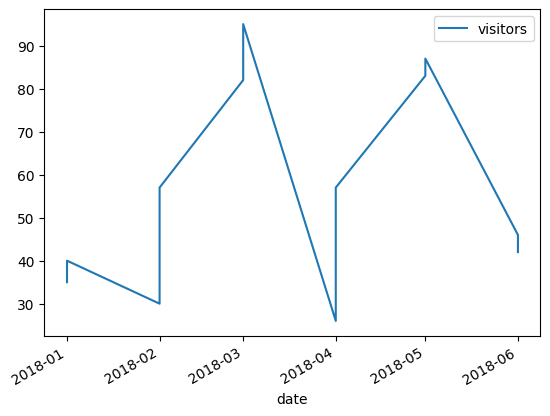

In [41]:
df.plot()

In [42]:
df.groupby('date').describe()

visitors                                                 
              count  mean        std   min    25%   50%    75%   max
date                                                                
2018-01-01      2.0  37.5   3.535534  35.0  36.25  37.5  38.75  40.0
2018-02-01      2.0  43.5  19.091883  30.0  36.75  43.5  50.25  57.0
2018-03-01      2.0  88.5   9.192388  82.0  85.25  88.5  91.75  95.0
2018-04-01      2.0  41.5  21.920310  26.0  33.75  41.5  49.25  57.0
2018-05-01      2.0  85.0   2.828427  83.0  84.00  85.0  86.00  87.0
2018-06-01      2.0  44.0   2.828427  42.0  43.00  44.0  45.00  46.0

Descriptive statistics for the data entered manually. We are not including the count in this table.

**Directive Meaning**
```
%a abbreviated weekday name
%A full weekday name
%b abbreviated month name
%B full month name
%c preferred date and time representation
%d day of the month (1 to 31)
%D same as %m/%d/%y
%e day of the month (1 to 31)
%m month (1 to 12)
%M minute
%S second
%u weekday as a number (Mon=1 to 7)
```

In [44]:
# We can provide a data in plain natural language, and convert it to a date type.
date = pd.to_datetime("14th of October, 2016")
date

Timestamp('2016-10-14 00:00:00')

In [46]:
# strftime lets us obtain a string out of the time stamp.
date.strftime('%A')

'Friday'

In [47]:
date.strftime('%B')


'October'

In [48]:
 date.strftime('%u')

'5'

In some cases we may need to create time series data from scratch. In this section, we are going to explore some of the ways in which Pandas enables us to create and manipulate time series data on top of the commands we have discussed up until this point.

The first thing to take care of is the time ranges required for our data set. For example, we can ask Pandas to create a series of dates with date_range:



In [49]:
# We can determine a time range by specifying start and end times.
pd.date_range('2018-05-30', '2018-06-02')

DatetimeIndex(['2018-05-30', '2018-05-31', '2018-06-01', '2018-06-02'], dtype='datetime64[ns]', freq='D')

Note that the output of the command above is an index covering the time range requested with a daily frequency, as shown in the output with freq=‘D‘.  

An alternative to the above command is to provide a start date, but instead of giving an end date, we request a number of “periods” to cover with the time series:


In [50]:
pd.date_range('2018-05-30', periods=4)

DatetimeIndex(['2018-05-30', '2018-05-31', '2018-06-01', '2018-06-02'], dtype='datetime64[ns]', freq='D')

This hints to the fact that we can provide a number of periods to cover, as well as the frequency we require. For
example, we can request for four monthly periods:

Here we provide a start time, a number of periods and the frequency for those periods.


In [51]:
pd.date_range('2018-05-30', periods=4, freq='M')

DatetimeIndex(['2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31'], dtype='datetime64[ns]', freq='M')

As you can see, all we had to do was specify the monthly frequency with freq=’M’. Let us construct a more complicated dataset: For a period of four days starting on June 4, 2018; we take readings for four features called A, B, C and D. In this case we will generate the readings with a random number sampled from a standard normal distribution. Let us create some definitions:



In [52]:
from numpy.random import randn
idx = pd.date_range('2018-06-04 00:00:00', periods=4)
cols = ['A', 'B', 'C', 'D']


We will now create data for four rows and four columns with the help of randn:

In [53]:
# randn(m, n) creates an array of m rows and n columns.
data = randn(len(idx), len(cols))
data

array([[ 1.70884104,  0.23335079,  0.69038313, -1.89596044],
       [ 0.9869821 ,  0.9786791 ,  0.10556583, -0.50736848],
       [-0.55246621, -0.06711795, -0.76402801,  0.12067528],
       [-0.20326355, -0.30692721,  1.8081249 , -0.53769429]])

With this information, we now create our dataframe. 

In [54]:
df = pd.DataFrame(data=data, index=idx, columns=cols)
df.index.name='date'

In [55]:
df

,A,B,C,D
date,,,,
2018-06-04,1.708841,0.233351,0.690383,-1.895960
2018-06-05,0.986982,0.978679,0.105566,-0.507368
2018-06-06,-0.552466,-0.067118,-0.764028,0.120675
2018-06-07,-0.203264,-0.306927,1.808125,-0.537694


Since we used random numbers to generate the data, the numbers shown here will differ from those you may obtain on your computer.

A table like the one above is useful to summarise data
and it is fit for “human consumption”. However, in many 
applications, it is much better to have a “long format” or
“melted” dataset, i.e., instead of arranging the data in a
rectangular format as shown above, we would like all the
data readings in a single column.

In order to achieve this, we need to repeat the dates and we
also require a new column to hold the feature to which each
reading corresponds. This can easily be done with Pandas
in a single command. The first thing we need to do is reset
the index.

In [56]:
# This is because we need the date to be part of the new formatted dataset.

df.reset_index(inplace=True)

In [57]:
df

,date,A,B,C,D
0,2018-06-04,1.708841,0.233351,0.690383,-1.895960
1,2018-06-05,0.986982,0.978679,0.105566,-0.507368
2,2018-06-06,-0.552466,-0.067118,-0.764028,0.120675
3,2018-06-07,-0.203264,-0.306927,1.808125,-0.537694


In order to melt the dataframe, we will use the melt method
that takes the following parameters: A column that will
become the new identifier variable with id_vars, the
columns to un-pivot are specified with value_vars and
finally the names for the variable and value columns with
var_name and value_name, respectively:

In [61]:
melted = pd.melt(df, id_vars='date', var_name='feature', value_name='reading')
melted

,date,feature,reading
0,2018-06-04,A,1.708841
1,2018-06-05,A,0.986982
2,2018-06-06,A,-0.552466
3,2018-06-07,A,-0.203264
4,2018-06-04,B,0.233351
5,2018-06-05,B,0.978679
6,2018-06-06,B,-0.067118
7,2018-06-07,B,-0.306927
8,2018-06-04,C,0.690383
9,2018-06-05,C,0.105566


The original columns have become entries in the column called “features” and the values are inthe column “reading”.

We can now set the index and sort the melted dataset:

In [62]:
melted.set_index('date', inplace=True)
melted.sort_index(inplace=True)
melted

,feature,reading
date,,
2018-06-04,A,1.708841
2018-06-04,B,0.233351
2018-06-04,C,0.690383
2018-06-04,D,-1.895960
2018-06-05,A,0.986982
2018-06-05,B,0.978679
2018-06-05,C,0.105566
2018-06-05,D,-0.507368
2018-06-06,A,-0.552466


Let us take a look at some of the manipulations we have described above used in a more real dataset.
Dataset reference: https://figshare.com/articles/dataset/Apple_Inc_Prices_Apr_2017_-_Apr_2018/6339830/1



In [6]:
import numpy as np
import pandas as pd

appl = pd.read_csv('AAPL.csv')
appl.Date = pd.to_datetime(appl.Date, format='%Y-%m-%d')

# We set up the index with set_index().
appl.set_index('Date', inplace=True)


In [7]:
# We centre our attention on the use of the closing prices.
appl['Close'].head(3)


Date
2017-04-25    144.529999
2017-04-26    143.679993
2017-04-27    143.789993
Name: Close, dtype: float64

In [10]:
# Sorting by the index is done with sort_index().
appl.sort_index(inplace=True)

In [11]:
appl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-25,143.910004,144.899994,143.869995,144.529999,142.279205,18871500
2017-04-26,144.470001,144.600006,143.380005,143.679993,141.442444,20041200
2017-04-27,143.919998,144.160004,143.309998,143.789993,141.550735,14246300
2017-04-28,144.089996,144.300003,143.270004,143.649994,141.412918,20860400
2017-05-01,145.100006,147.199997,144.960007,146.580002,144.297287,33602900
...,...,...,...,...,...,...
2018-04-19,173.759995,175.389999,172.660004,172.800003,172.800003,34808800
2018-04-20,170.600006,171.220001,165.429993,165.720001,165.720001,65491100
2018-04-23,166.830002,166.919998,164.089996,165.240005,165.240005,36515500


In [13]:
# We are using pct_change() to calculate the returns.
appl['pct_change'] = appl.Close.pct_change()
appl['pct_change'].tail(3)


Date
2018-04-23   -0.002896
2018-04-24   -0.013919
2018-04-25    0.004357
Name: pct_change, dtype: float64

In [15]:
# Continuous compounding of returns leads to the use of log returns.

appl['log_ret'] = np.log(appl.Close).diff()
appl['log_ret'].tail(3)

Date
2018-04-23   -0.002901
2018-04-24   -0.014017
2018-04-25    0.004348
Name: log_ret, dtype: float64

It is fairly common to have financial data series like the
one we have used above, where the frequency is given
by the end of day prices. However, the frequency can be
different, for instance given by the minimum upward or
downward price movement in the price of a security. This
is known as a tick. Let us take a look at tick data for the
Bitcoin/USD exchange rate. The dataset is available at
https://figshare.com/articles/dataset/Bitcoin_USD_exchange_rate_Mar_31-_Apr_3_2016/6452831/1

A “tick” is a measure of the
minimum upward or downward
movement in the price of a
security.

The data contains prices for covering tick data between March
31 and April 3, 2016.

We can read the data in the usual way. However, if we were
to inspect the data, we will notice that the date is stored in a 
column called time_start, and that the format is such that
the day is placed first, followed by the month and the year;
the time in hours and minutes is provided. We can use this
information to create a rule to parse the date:


In [54]:

import numpy as np
import pandas as pd

# Define a custom date parser using pd.to_datetime
parser = lambda date: pd.to_datetime(date, format='%d/%m/%Y %H:%M')

# Specify the CSV file and read the data
fname = 'bitcoin_usd.csv'
bitcoin = pd.read_csv(fname, parse_dates=['time_start'], date_parser=parser, index_col='time_start')



/var/folders/h4/4r8xz2sd4fj700_z69vjxz1m0000gn/T/ipykernel_9337/53506066.py:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  bitcoin = pd.read_csv(fname, parse_dates=['time_start'], date_parser=parser, index_col='time_start')


In [55]:
# We are effectively creating a new dataframe called ticks.
ticks = bitcoin[['close', 'volume']]
ticks

,close,volume
time_start,,
2016-03-31 00:00:00,413.27,8.953746
2016-03-31 00:01:00,413.27,0.000000
2016-03-31 00:02:00,413.27,0.000000
2016-03-31 00:03:00,413.27,4.726186
2016-03-31 00:04:00,413.27,0.000000
...,...,...
2016-04-03 23:35:00,420.60,0.000000
2016-04-03 23:53:00,420.60,0.955772
2016-04-03 23:57:00,421.00,58.000000


The data is roughly on a minute-by-minute frequency. We
can use Pandas to resample the data at desired intervals.
For instance we can request for the data to be sampled every
five minutes and take the first value in the interval:


In [56]:
# We can resample our data with the help of resample()
ticks.resample('5Min').first()

,close,volume
time_start,,
2016-03-31 00:00:00,413.27,8.953746
2016-03-31 00:05:00,413.26,0.035157
2016-03-31 00:10:00,413.51,43.640052
2016-03-31 00:15:00,414.98,0.038896
2016-03-31 00:20:00,414.98,0.241800
...,...,...
2016-04-03 23:35:00,420.60,0.000000
2016-04-03 23:40:00,NaN,NaN
2016-04-03 23:45:00,NaN,NaN


In [57]:
# We can also ask for the mean, for example
ticks.resample('5Min').mean()


,close,volume
time_start,,
2016-03-31 00:00:00,413.270000,2.735987
2016-03-31 00:05:00,413.264000,2.211749
2016-03-31 00:10:00,414.660000,37.919166
2016-03-31 00:15:00,414.982000,5.574657
2016-03-31 00:20:00,414.986000,0.063756
...,...,...
2016-04-03 23:35:00,420.600000,0.000000
2016-04-03 23:40:00,NaN,NaN
2016-04-03 23:45:00,NaN,NaN


In this way we could get the closing price for the day by
resampling by day and requesting the last value:

In [58]:
ticks.resample('D').last()


,close,volume
time_start,,
2016-03-31,416.02,0.200000
2016-04-01,417.90,52.099684
2016-04-02,420.30,0.850000
2016-04-03,420.60,0.984358


Now that we know how to resample the data, we can
consider creating a new open, high, low and close set of
prices for the resampled data. Let us do this for the
five-minute bars:

In [59]:
# The ohlc() method lets us find the OHLC prices for our new sampled data.

bars = ticks['close'].resample('5Min').ohlc()
bars

,open,high,low,close
time_start,,,,
2016-03-31 00:00:00,413.27,413.27,413.27,413.27
2016-03-31 00:05:00,413.26,413.28,413.25,413.28
2016-03-31 00:10:00,413.51,414.98,413.51,414.98
2016-03-31 00:15:00,414.98,414.99,414.98,414.98
2016-03-31 00:20:00,414.98,414.99,414.98,414.99
...,...,...,...,...
2016-04-03 23:35:00,420.60,420.60,420.60,420.60
2016-04-03 23:40:00,NaN,NaN,NaN,NaN
2016-04-03 23:45:00,NaN,NaN,NaN,NaN


Pandas will take the first and last values in the interval to be
the open and close for the bar. Then it will take the max and
min as the high and low, respectively. In this way, we start
filtering the data. For example, imagine we are interested in
the prices between 10 am and 4 pm each day:


In [60]:
# Notice the use of between_time to filter the data
filtered = bars.between_time('10:00', '16:00')
filtered

,open,high,low,close
time_start,,,,
2016-03-31 10:00:00,416.00,416.00,415.98,415.98
2016-03-31 10:05:00,415.98,415.98,415.97,415.97
2016-03-31 10:10:00,415.97,415.97,415.96,415.96
2016-03-31 10:15:00,415.96,415.97,415.96,415.96
2016-03-31 10:20:00,415.96,415.98,415.96,415.96
...,...,...,...,...
2016-04-03 15:40:00,421.02,421.02,421.00,421.00
2016-04-03 15:45:00,421.01,421.01,421.01,421.01
2016-04-03 15:50:00,421.01,421.01,421.01,421.01


In [61]:
# We may be interested in looking at the price first thing in the morning — say 8 am:
bars.open.at_time('8:00')

# In this case we are using the at_time method.

time_start
2016-03-31 08:00:00    416.11
2016-04-01 08:00:00    416.02
2016-04-02 08:00:00    420.69
2016-04-03 08:00:00    418.78
Freq: 1440T, Name: open, dtype: float64

In [62]:
# Not only that, we can request the percentage change too by combining the methods we have already discussed:
bars.open.at_time('8:00').pct_change()


time_start
2016-03-31 08:00:00         NaN
2016-04-01 08:00:00   -0.000216
2016-04-02 08:00:00    0.011225
2016-04-03 08:00:00   -0.004540
Freq: 1440T, Name: open, dtype: float64

In [63]:
bars.tail()

,open,high,low,close
time_start,,,,
2016-04-03 23:35:00,420.6,420.6,420.6,420.6
2016-04-03 23:40:00,NaN,NaN,NaN,NaN
2016-04-03 23:45:00,NaN,NaN,NaN,NaN
2016-04-03 23:50:00,420.6,420.6,420.6,420.6
2016-04-03 23:55:00,421.0,421.0,420.6,420.6


In [64]:
bars.fillna(method='ffill', limit=1)

# Here we have filled the missing data by bringing the last value forward and limitting the 
# operation to one time period.

,open,high,low,close
time_start,,,,
2016-03-31 00:00:00,413.27,413.27,413.27,413.27
2016-03-31 00:05:00,413.26,413.28,413.25,413.28
2016-03-31 00:10:00,413.51,414.98,413.51,414.98
2016-03-31 00:15:00,414.98,414.99,414.98,414.98
2016-03-31 00:20:00,414.98,414.99,414.98,414.99
...,...,...,...,...
2016-04-03 23:35:00,420.60,420.60,420.60,420.60
2016-04-03 23:40:00,420.60,420.60,420.60,420.60
2016-04-03 23:45:00,NaN,NaN,NaN,NaN


In [76]:
# Let us fill both gaps and create a new dataframe:
filledbars = bars.fillna(method='ffill')
filledbars


,open,high,low,close
time_start,,,,
2016-03-31 00:00:00,413.27,413.27,413.27,413.27
2016-03-31 00:05:00,413.26,413.28,413.25,413.28
2016-03-31 00:10:00,413.51,414.98,413.51,414.98
2016-03-31 00:15:00,414.98,414.99,414.98,414.98
2016-03-31 00:20:00,414.98,414.99,414.98,414.99
...,...,...,...,...
2016-04-03 23:35:00,420.60,420.60,420.60,420.60
2016-04-03 23:40:00,420.60,420.60,420.60,420.60
2016-04-03 23:45:00,420.60,420.60,420.60,420.60


For the volume it would make sense to consider the sum of
all the securities traded in the five-minute interval:

In [80]:
volume = ticks.volume.resample('5Min').sum()
vol = volume.fillna(0.)

In [82]:
filledbars=bars.resample('5Min').sum()
filledbars

,open,high,low,close
time_start,,,,
2016-03-31 00:00:00,413.27,413.27,413.27,413.27
2016-03-31 00:05:00,413.26,413.28,413.25,413.28
2016-03-31 00:10:00,413.51,414.98,413.51,414.98
2016-03-31 00:15:00,414.98,414.99,414.98,414.98
2016-03-31 00:20:00,414.98,414.99,414.98,414.99
...,...,...,...,...
2016-04-03 23:35:00,420.60,420.60,420.60,420.60
2016-04-03 23:40:00,0.00,0.00,0.00,0.00
2016-04-03 23:45:00,0.00,0.00,0.00,0.00


A plot of the open, high, low and close prices for the fiveminute bars, together with the corresponding volume for the 3rd of April between 9 am and 11.59 pm is shown

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plotting for filledbars DataFrame
filledbars['2016-04-03'].between_time('9:00', '23:59').plot(
    color=['gray', 'gray', 'gray', 'k'],
    style=['-', '--', '-.', '-+'])

# Plotting for vol DataFrame with secondary y-axis
vol['2016-04-03'].between_time('9:00', '23:59').plot(
    secondary_y=True,
    style='k-o')

# Display the plots
plt.show()


KeyError: '2016-04-03'